In [9]:
import os
import numpy
import collections
from global_utils.FileOps import read_pkl, write_pkl, write_file, read_file
'''
https://webvpn.ruc.edu.cn/ 然后进行跳转到下面的地址
env: py35
pip install jupyter
网页版访问:
    jupyter notebook --ip=0.0.0.0 --port=8080 --no-browser --allow-root
    http://202.112.113.78:10086/?token=3150b803eb90c9a758496b5bba743f5dc3bbb9391128b67c
VSCODE + jupyter notebook
    在extention 中安装 jupyter 和 jupyter notebook 即可
数据可视化，显示格式如下，如果 回复是图片那么直接显示:
Q1:
A1:
Q2:
Q3:
'''
image_dir = '/data3/zjm/dataset/jddc2020/train'
data_path = '/data3/zjm/dataset/jddc2020/data_train.txt'
sessId2sess_path ='/data3/zjm/dataset/jddc2020/data_train_sessId2sess.pkl'
# fx and xjd
fx_sessId2sess_path = '/data3/zjm/dataset/jddc2020/data_train_fx_sessId2sess.pkl'
xjd_sessId2sess_path = '/data3/zjm/dataset/jddc2020/data_train_xjd_sessId2sess.pkl'
# special tasks
temp_special_sessId2sess_path ='/data3/zjm/dataset/jddc2020/data_train_special_sessIndex2sessId.pkl'

In [10]:
def get_sessId2sess(data_path, sessId2sess_path):
    sessId2sess = collections.OrderedDict()
    lines = read_file(data_path)
    sessinfo = collections.OrderedDict()
    for line in lines:
        splits = line.strip('\n').split('\t')
        sid = splits[0]  # sessid
        if sessId2sess.get(sid) is None:
            sessId2sess[sid] = [splits]
        else:
            sessId2sess[sid] += [splits]
    print(len(sessId2sess))
    print(sessId2sess['90dd6836ec7cb5657316f9dae3d879d9'])
    write_pkl(sessId2sess_path, sessId2sess)

In [11]:
def get_special_sessId2sess(sessId2sess, special_sessId2sess_path, keywords='售前'):
    special_sessId2sess = collections.OrderedDict()
    sessIds = list(sessId2sess.keys())
    list_keywords = keywords.split(' ')
    for sessId in sessIds:
        flag = False
        sessinfo = sessId2sess[sessId]
        for instance in sessinfo:
            text = instance[3]
            for keyword in list_keywords:
                if keyword in text:
                    flag = True
                    special_sessId2sess[sessId] = sessinfo
                    break
            if flag == True:
                break
    print('special {} total {} sessions'.format(keywords, len(special_sessId2sess)))
    write_pkl(special_sessId2sess_path, special_sessId2sess)

In [ ]:
# get all sessions info, just run onece
get_sessId2sess(data_path, sessId2sess_path)

In [ ]:
# use all the sessions, when use
sessId2sess = read_pkl(sessId2sess_path)
print('there are {} sessions'.format(sessId2sess))

In [ ]:
def get_fx_xjd_sessId2sess(sessId2sess, fx_sessId2sess_path,  xjd_sessId2sess_path):
    special_sessId2sess = collections.OrderedDict()
    sessIds = list(sessId2sess.keys())
    fx_sessId2sess = collections.OrderedDict()
    xjd_sessId2sess = collections.OrderedDict()
    for sessId in sessIds:
        sessinfo = sessId2sess[sessId]
        shop = sessinfo[0][1]
        if shop == 'fx':
            fx_sessId2sess[sessId] = sessinfo
        elif shop == 'xjd':
            xjd_sessId2sess[sessId] = sessinfo
        else:
            pass
    print('total {} fx {} xjd {}'.format(len(sessIds), len(fx_sessId2sess), len(xjd_sessId2sess)))
    write_pkl(fx_sessId2sess_path, fx_sessId2sess)
    write_pkl(xjd_sessId2sess_path, xjd_sessId2sess)

In [ ]:
# get fx and xjd seprate sessions info, just run onece
get_fx_xjd_sessId2sess(sessId2sess, fx_sessId2sess_path, xjd_sessId2sess_path)

In [12]:
# use fx or xjd type tasks
sessId2sess = read_pkl(fx_sessId2sess_path)
print('fx there are {} sessions'.format(sessId2sess))

In [13]:
keywords = ['售前', '售后', '退货 换货', '尺码 大小 标准码', '安装 使用 功能'][0]
get_special_sessId2sess(sessId2sess, temp_special_sessId2sess_path, keywords)

special 售前 total 10279 sessions
write /data3/zjm/dataset/jddc2020/data_train_special_sessIndex2sessId.pkl


In [14]:
# use special type tasks
sessId2sess = read_pkl(temp_special_sessId2sess_path)
print('{} there are {} sessions'.format(keywords, sessId2sess))

6206d4.jpg', '0'], ['054131e3b34084cba170a914a5980957', 'fx', '', '售前咨询组', '0'], ['054131e3b34084cba170a914a5980957', 'fx', '', '您好，欢迎光临***官方旗舰店，我是售前客服~很高兴为您服务 (づ￣ 3￣)づ ★★春尚新优惠满减开始啦！！活动时间为24-26号：平台优惠券满300-30,可叠加店铺优惠券满600-30,900-60获得600-60,900-90的活动优惠哦~下面是优惠券领取链接：<url>    ★★ 这边为您推荐几款热销商品~ 春季热销款男鞋链接：<url>        春季热销款女鞋链接：<url>  ★★***仓库防护措施：1、所有复工人员，必须佩戴口罩；2、所有复工人员在上下班必须要求监测体温并统计，如有体温异常者，一律不得进入库内并送往医院；3、仓库内安排专人每日对公共区域至少消毒2次或以上，抗击疫情我们是认真的，武汉加油！中国加油！请您放心购买★★ps：近期有欺诈短信，大家切记勿信，有疑问咨询客服', '1'], ['054131e3b34084cba170a914a5980957', 'fx', '', '有这双鞋吗', '0'], ['054131e3b34084cba170a914a5980957', 'fx', '', '？', '0'], ['054131e3b34084cba170a914a5980957', 'fx', '', '你好', '0'], ['054131e3b34084cba170a914a5980957', 'fx', '', '7ab0fccce6ef4a14e7db793c41d4fc98.jpg', '0'], ['054131e3b34084cba170a914a5980957', 'fx', '', '暂时没有出售哦', '1'], ['054131e3b34084cba170a914a5980957', 'fx', '', '好的', '0'], ['054131e3b34084cba170a914a5980957', 'fx', '', '#E-s21', '1']]), ('eb6d8e1270ba4cce719b301eb7fc7e5a', [['eb6d8e12

In [19]:
# https://www.jianshu.com/p/da1bb2a3b3dd
from IPython.core.display import Image, display
def show_img(image_path):
    display(Image(image_path, width=50, height=50, unconfined=True))
# image_path = os.path.join(image_dir, '98f2271305a93d8ad32424fdc169c311.jpg')
# show_img(image_path)

In [20]:
# show one sess info
def show_one_sess(sessId2sess, sessIndex):
    sessIds = list(sessId2sess.keys())
    sessinfo = sessId2sess[sessIds[sessIndex]]
    for lid in range(len(sessinfo)):
        splits = sessinfo[lid]
        sid = splits[0]  # sessid
        shop = splits[1] # fx or xjd
        pid = splits[2]  # productId
        text = splits[3] 
        waiter = splits[4] # 1 表示 客服 0
        if waiter == '1':
            uttId = 'A-{}'.format(lid)
        else:
            uttId = 'Q-{}'.format(lid)
        if 'jpg' in text:
            print(uttId + ': ' + text)
            show_img(os.path.join(image_dir, text))
        else:
            print(uttId + ': ' + text)

Q-0: 在吗
Q-1: ff58039408708424175e295216b6445c.jpg


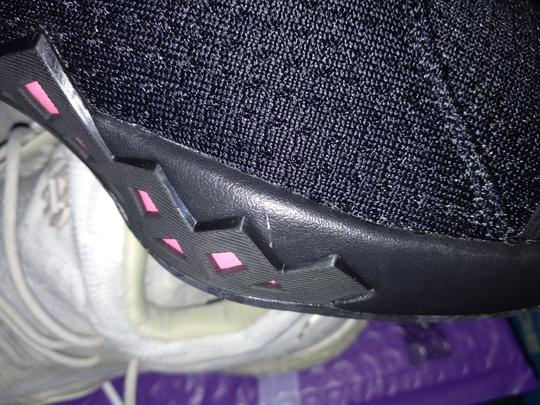

Q-2: 0c0da3b0c4b1ee5ed37c436e7c0d97d9.jpg


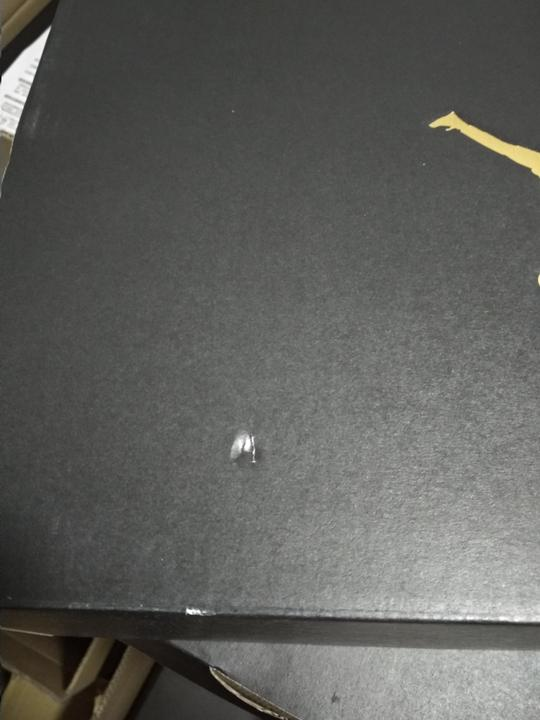

A-3: 您好，欢迎光临***官方旗舰店，我是售前客服~很高兴为您服务 (づ￣ 3￣)づ ★★春尚新优惠满减开始啦！！活动时间为24-26号：平台优惠券满300-30,可叠加店铺优惠券满600-30,900-60获得600-60,900-90的活动优惠哦~下面是优惠券领取链接：<url>    ★★ 这边为您推荐几款热销商品~ 春季热销款男鞋链接：<url>        春季热销款女鞋链接：<url>  ★★***仓库防护措施：1、所有复工人员，必须佩戴口罩；2、所有复工人员在上下班必须要求监测体温并统计，如有体温异常者，一律不得进入库内并送往医院；3、仓库内安排专人每日对公共区域至少消毒2次或以上，抗击疫情我们是认真的，武汉加油！中国加油！请您放心购买★★ps：近期有欺诈短信，大家切记勿信，有疑问咨询客服 
Q-4: 刮痕 鞋盒也有破损
Q-5: 人工客服
Q-6: 售后咨询组
A-7: 这边为您转接售后 为您跟进处理呢~~ 


In [26]:
show_one_sess(sessId2sess, sessIndex=140)